In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [2]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
books = pd.read_excel('Data_Test.xlsx')
books.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [5]:
books

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"
...,...,...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media"
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts"
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts"


In [6]:
books.shape

(1560, 8)

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [8]:
books.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

In [9]:
books.describe()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [10]:
# sns.distplot(books.Price)
# plt.show()

In [11]:
# Highly right skewed data due to a few expensive books

In [12]:
books.Title.nunique()

1521

In [13]:
books.Author.nunique()

1224

In [14]:
val = books.groupby('Title')['Edition'].value_counts()
val[val > 1]

Title                                                                                                                                                          Edition                            
A Dance with Dragon: After the Feast - Part 2 (A Song of Ice and Fire)                                                                                         Paperback,– 15 Mar 2012                2
Accidental Heroes                                                                                                                                              Paperback,– 22 Mar 2018                2
Alita: Battle Angel – The Official Movie Novelization                                                                                                          Paperback,– 14 Feb 2019                2
Art of Sin City                                                                                                                                                Paperback,– 15 Jul 2014                2
Aster

In [15]:
books[books.Title == '1984']

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory


In [16]:
books.Genre.nunique()

225

# Cleaning

In [17]:
df1 = books.copy()

In [18]:
df1.Edition.str.split(',–')

0       [Mass Market Paperback,  1 Oct 1986]
1          [Paperback,  Import, 26 Apr 2018]
2                  [Paperback,  17 Mar 2011]
3                         [Paperback,  2016]
4                  [Paperback,  26 Dec 2011]
                        ...                 
1555               [Paperback,  14 Apr 2011]
1556                [Paperback,  8 May 2013]
1557                [Paperback,  6 Sep 2011]
1558               [Paperback,  22 Sep 2009]
1559               [Paperback,  16 Sep 2016]
Name: Edition, Length: 1560, dtype: object

In [19]:
def cover(x):
    return x.split(',–')[0]

In [20]:
df1['cover_type'] = df1['Edition'].map(cover)

In [21]:
df1.cover_type.unique()

array(['Mass Market Paperback', 'Paperback', 'Hardcover', 'Cards',
       'Sheet music', 'Flexibound', 'Spiral-bound', '(Chinese),Paperback',
       'Loose Leaf'], dtype=object)

In [22]:
def covers(x):
    return x.split(',')[-1]

In [23]:
df1['cover_type'] = df1.cover_type.map(covers)

In [24]:
df1.cover_type.unique()

array(['Mass Market Paperback', 'Paperback', 'Hardcover', 'Cards',
       'Sheet music', 'Flexibound', 'Spiral-bound', 'Loose Leaf'],
      dtype=object)

In [25]:
df1.cover_type.value_counts()

Paperback                1266
Hardcover                 233
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
Cards                       1
Loose Leaf                  1
Name: cover_type, dtype: int64

In [26]:
def final_cover(x):
    lst = ['Paperback', 'Hardcover', 'Mass Market Paperback']
    if x not in lst:
        return 'Other'
    else:
        return x

In [27]:
df1.cover_type = df1.cover_type.map(final_cover)
df1.cover_type.value_counts()

Paperback                1266
Hardcover                 233
Mass Market Paperback      45
Other                      16
Name: cover_type, dtype: int64

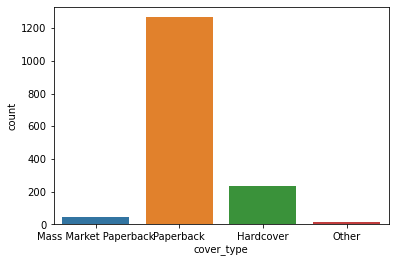

In [28]:
sns.countplot(df1.cover_type)
plt.show()

In [29]:
df1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,cover_type
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",Mass Market Paperback
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,Paperback
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",Paperback
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",Paperback


In [30]:
def ed_year(x):
    pattern = '\d{4}'
    match = re.findall(pattern, x)
    temp = ''.join(match)
    if temp != '':
        return int(temp)

In [31]:
df1['edition_year'] = df1['Edition'].map(ed_year)

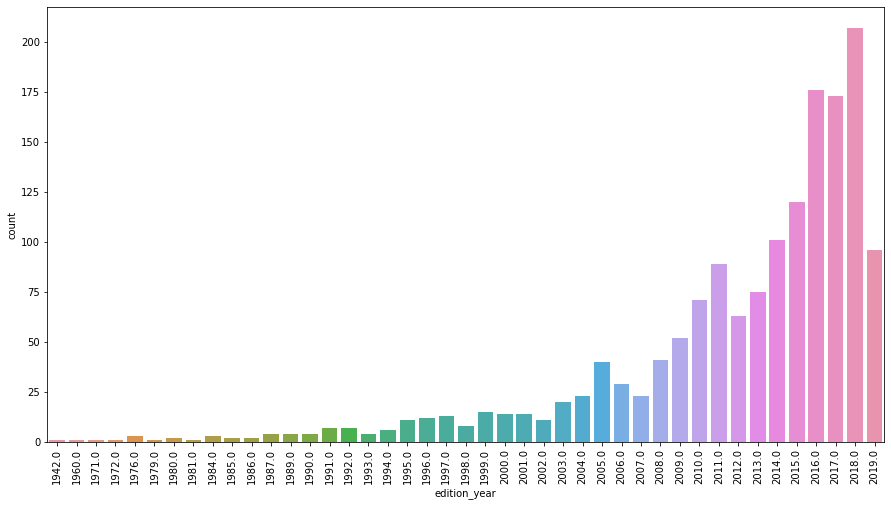

In [32]:
plt.rcParams['figure.figsize'] = [15, 8]
sns.countplot(df1.edition_year)
plt.xticks(rotation=90)
plt.show()

In [33]:
df1['edition_year_cat'] = pd.cut(df1['edition_year'], bins=[1899, 1981, 1999, 2010, 2020], labels=['Very Old', 'Old', 'Mid', 'New'])

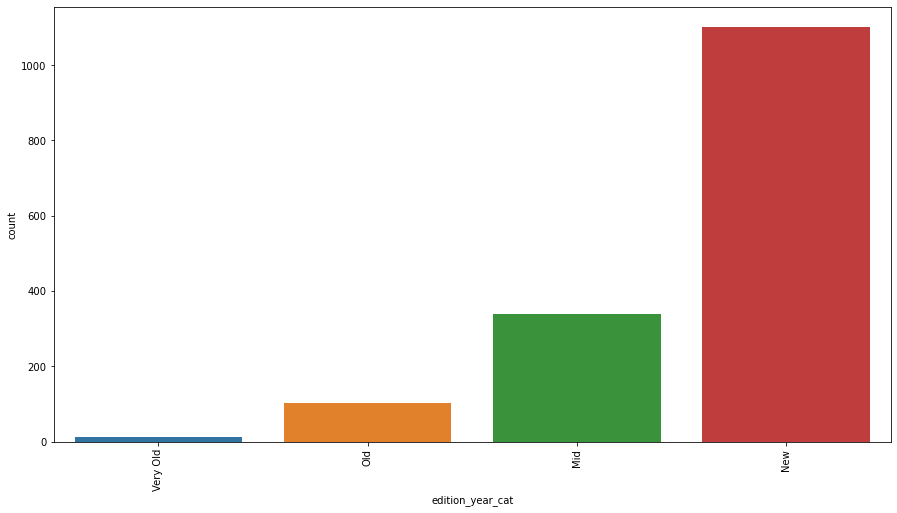

In [34]:
sns.countplot(df1.edition_year_cat)
plt.xticks(rotation=90)
plt.show()

In [35]:
df1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,cover_type,edition_year,edition_year_cat
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",Mass Market Paperback,1986.0,Old
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback,2018.0,New
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,Paperback,2011.0,New
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",Paperback,2016.0,New
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",Paperback,2011.0,New


In [36]:
df1.loc[df1.edition_year_cat.isna()]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,cover_type,edition_year,edition_year_cat
97,34 Bubblegums and Candies,Preeti Shenoy,"Paperback,– Audiobook, Illustrated, Large Print",3.6 out of 5 stars,156 customer reviews,An anthology of some light-minded and heart-wa...,Indian Writing (Books),Romance,Paperback,NaN,NaN
178,Gandhi: My Life is My Message,"Jason Quinn, Sachin Nagar","Paperback,– Import, Illustrated",4.0 out of 5 stars,11 customer reviews,My life is my message. Mohandas Gandhi was a f...,Comics & Mangas (Books),Comics & Mangas,Paperback,NaN,NaN
396,Measurement,Paul Lockhart,"Paperback,– Audiobook, Box set, Large Print",5.0 out of 5 stars,2 customer reviews,"For seven years, Paul Lockhart's A Mathematici...",Geometry,Politics,Paperback,NaN,NaN
579,"The Spy Chronicles: RAW, ISI and the Illusion ...",A.S. Dulat,"Hardcover,– Illustrated, Import",3.5 out of 5 stars,132 customer reviews,Pointing to the horizon where the sea and sky ...,Politics (Books),Politics,Hardcover,NaN,NaN
955,Sachin Tendulkar: The Man Cricket Loved Back,ESPN Cricinfo,"Paperback,– Abridged, Audiobook, Large Print",4.6 out of 5 stars,124 customer reviews,"""Sachin Sachin"" will reverberate in my ears ti...",Biographies & Autobiographies (Books),Sports,Paperback,NaN,NaN
1179,Max Payne 3: The Complete Series,Sam Lake,"Hardcover,– Abridged, Audiobook, Box set",4.6 out of 5 stars,3 customer reviews,Co-authored by the writers of the Max Payne fr...,Comics,Comics & Mangas,Hardcover,NaN,NaN
1191,Pain is Really Strange,Steve Haines,"Paperback,– Illustrated, Import",5.0 out of 5 stars,1 customer review,Answering questions such as 'how can I change ...,Healthy Living & Wellness (Books),Comics & Mangas,Paperback,NaN,NaN
1408,Frank Miller's Sin City Volume 2: A Dame to Ki...,Frank Miller,"Paperback,– Abridged, Audiobook, Box set",5.0 out of 5 stars,3 customer reviews,The second volume of Frank Miller's signature ...,Science & Mathematics,Humour,Paperback,NaN,NaN
1541,"Cartooning, The Professional Step-by-Step Guid...","Ivan Hissey, Curtis Tappenden","Paperback,– Illustrated, Import",3.0 out of 5 stars,1 customer review,A comprehensive and practical guide to drawing...,"Handicrafts, Decorative Arts & Crafts (Books)","Computing, Internet & Digital Media",Paperback,NaN,NaN


In [37]:
df1.isna().sum()

Title               0
Author              0
Edition             0
Reviews             0
Ratings             0
Synopsis            0
Genre               0
BookCategory        0
cover_type          0
edition_year        9
edition_year_cat    9
dtype: int64

In [38]:
df1.shape

(1560, 11)

In [39]:
df1.edition_year.mode()

0    2018.0
dtype: float64

In [40]:
df1.edition_year.fillna(2018.0,inplace=True)

In [41]:
df1.edition_year_cat.mode()

0    New
Name: edition_year_cat, dtype: category
Categories (4, object): ['Very Old' < 'Old' < 'Mid' < 'New']

In [42]:
df1.edition_year_cat.fillna("New",inplace=True)

In [43]:
df1.isna().sum()

Title               0
Author              0
Edition             0
Reviews             0
Ratings             0
Synopsis            0
Genre               0
BookCategory        0
cover_type          0
edition_year        0
edition_year_cat    0
dtype: int64

In [44]:
df2 = df1

In [45]:
df2.shape

(1560, 11)

In [46]:
df2['edition_year'] = df2['edition_year'].astype(int)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Title             1560 non-null   object  
 1   Author            1560 non-null   object  
 2   Edition           1560 non-null   object  
 3   Reviews           1560 non-null   object  
 4   Ratings           1560 non-null   object  
 5   Synopsis          1560 non-null   object  
 6   Genre             1560 non-null   object  
 7   BookCategory      1560 non-null   object  
 8   cover_type        1560 non-null   object  
 9   edition_year      1560 non-null   int32   
 10  edition_year_cat  1560 non-null   category
dtypes: category(1), int32(1), object(9)
memory usage: 117.6+ KB


In [48]:
df2.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,cover_type,edition_year,edition_year_cat
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",Mass Market Paperback,1986,Old
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback,2018,New
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,Paperback,2011,New
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",Paperback,2016,New
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",Paperback,2011,New


In [49]:
def reviews(x):
    return float(x[:3])

In [50]:
df2['reviews'] = df2['Reviews'].map(reviews)

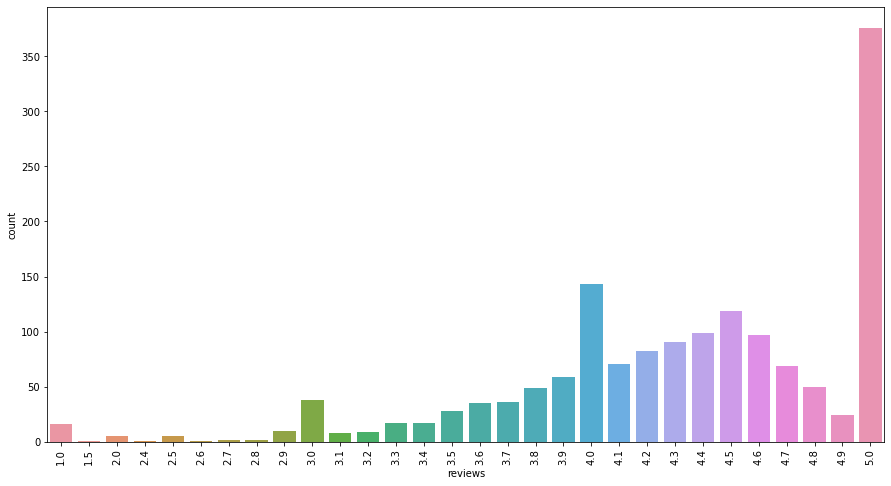

In [51]:
sns.countplot(df2.reviews)
plt.xticks(rotation=90)
plt.show()

In [52]:
def ratings(x):
    lst = []
    for i in x:
        if i.isdigit():
            lst.append(i)
    return float(''.join(lst))

In [53]:
df2['ratings'] = df2['Ratings'].map(ratings)

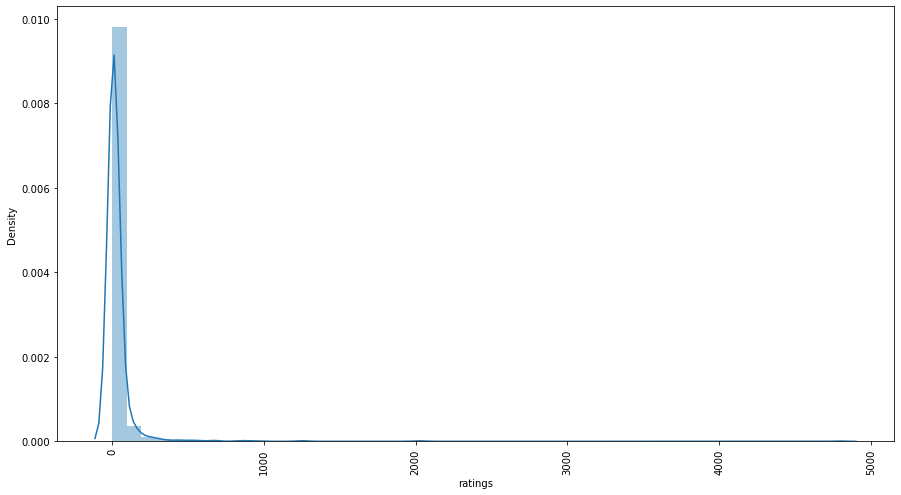

In [54]:
sns.distplot(df2.ratings)
plt.xticks(rotation=90)
plt.show()

In [55]:
df2.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,cover_type,edition_year,edition_year_cat,reviews,ratings
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",Mass Market Paperback,1986,Old,4.4,960.0
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback,2018,New,5.0,1.0
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,Paperback,2011,New,5.0,4.0
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",Paperback,2016,New,4.1,11.0
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",Paperback,2011,New,4.4,9.0


In [56]:
df2.BookCategory.nunique()

11

In [57]:
df2.Genre.nunique()

225

In [58]:
df2.Genre.value_counts().head(50).index

Index(['Action & Adventure (Books)', 'Romance (Books)',
       'Biographies & Autobiographies (Books)', 'Contemporary Fiction (Books)',
       'Crime, Thriller & Mystery (Books)', 'Mangas',
       'Comics & Mangas (Books)', 'Design', 'Indian Writing (Books)',
       'Music Books', 'Linguistics (Books)', 'Humour (Books)',
       'True Accounts (Books)', 'Sports Training & Coaching (Books)',
       'Arts History, Theory & Criticism (Books)', 'Computer Science Books',
       'Government (Books)', 'Software & Business Applications (Books)',
       'Dictionaries', 'Historical Fiction (Books)',
       'Comics & Graphic Novels (Books)', 'Cinema & Broadcast (Books)',
       'Language, Linguistics & Writing (Books)',
       'Handicrafts, Decorative Arts & Crafts (Books)', 'Asian History',
       'Games & Quizzes (Books)', 'Healthy Living & Wellness (Books)',
       'Comics', 'Encyclopaedias & Reference Works (Books)',
       'Writing Guides (Books)', 'Programming & Software Development (Books)'

In [59]:
genres = df2.Genre.value_counts().head(25).index

def genre_cat(x):
    if x not in genres:
        return 'Other'
    else:
        return x
    
df2['genre_cat'] = df2.Genre.map(genre_cat)

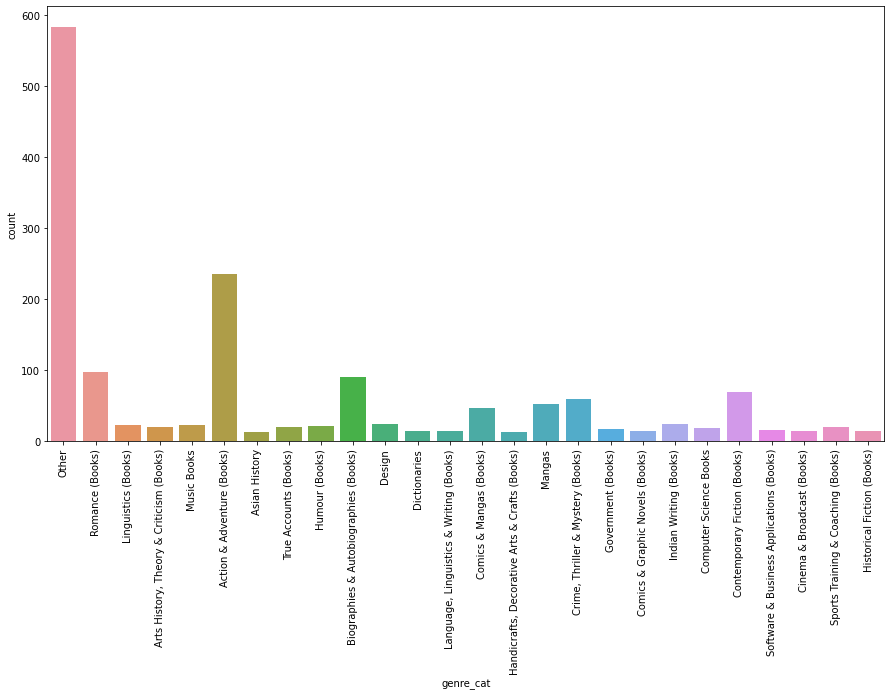

In [60]:
sns.countplot(df2.genre_cat)
plt.xticks(rotation=90)
plt.show()

In [61]:
df2.Author.nunique()

1224

In [62]:
df2.Author.value_counts().head(10)

Agatha Christie                 18
Ladybird                        14
Albert Uderzo                   14
DK                              13
Nora Roberts                    13
Wilbur Smith                     8
James Patterson                  7
Danielle Steel                   7
René Goscinny, Albert Uderzo     7
Lee Child                        7
Name: Author, dtype: int64

In [63]:
df2.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,cover_type,edition_year,edition_year_cat,reviews,ratings,genre_cat
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",Mass Market Paperback,1986,Old,4.4,960.0,Other
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback,2018,New,5.0,1.0,Other


In [64]:
df2['publish_recency'] = 2020 - df2.edition_year

In [65]:
df3 = df2.drop(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre', 'edition_year'], axis=1)
df3.head()

,BookCategory,cover_type,edition_year_cat,reviews,ratings,genre_cat,publish_recency
0,"Crime, Thriller & Mystery",Mass Market Paperback,Old,4.4,960.0,Other,34
1,"Computing, Internet & Digital Media",Paperback,New,5.0,1.0,Other,2
2,Romance,Paperback,New,5.0,4.0,Romance (Books),9
3,"Computing, Internet & Digital Media",Paperback,New,4.1,11.0,Other,4
4,"Language, Linguistics & Writing",Paperback,New,4.4,9.0,Linguistics (Books),9


In [66]:
cat_cols = df3.select_dtypes(exclude=np.number)
num_cols = df3.select_dtypes(include=np.number)

In [67]:
pw = PowerTransformer()
df3_trans = pd.DataFrame(pw.fit_transform(num_cols), columns=num_cols.columns)

sc = StandardScaler()
df3_scaled = pd.DataFrame(sc.fit_transform(df3_trans), columns=df3_trans.columns).reset_index(drop=True)
df3_scaled.shape

(1560, 3)

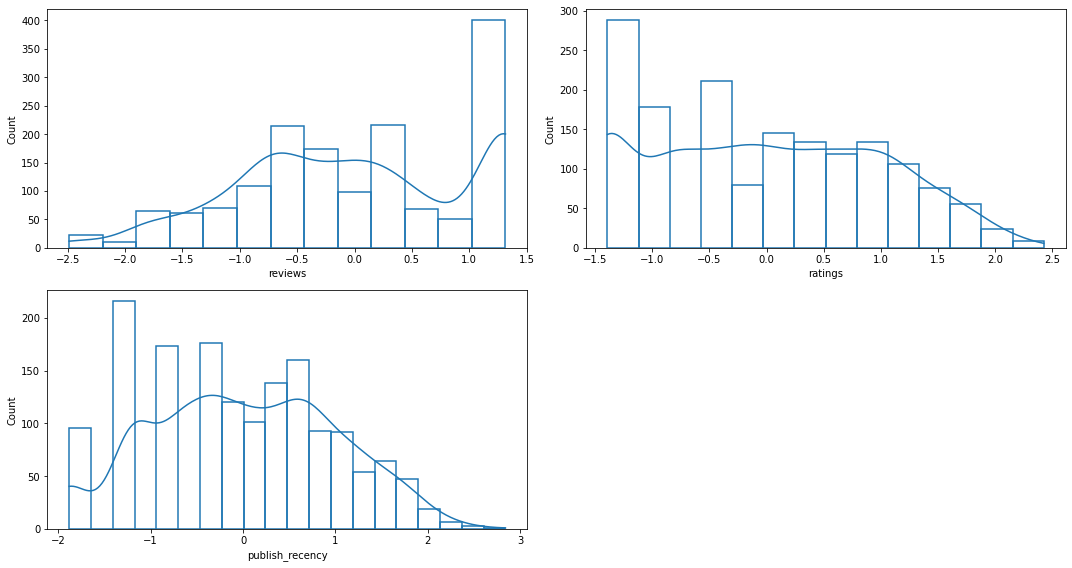

In [68]:
i = 1
for x in df3_scaled:
    plt.subplot(2, 2, i)
    sns.histplot(df3_scaled[x], kde=True, fill=False)
    i += 1
plt.tight_layout()

In [69]:
dummy_df = pd.get_dummies(data=cat_cols, drop_first=True).reset_index(drop=True)
dummy_df.shape

(1560, 41)

In [70]:
!pip install feature_engine

In [71]:
from feature_engine.encoding import CountFrequencyEncoder

# fe = CountFrequencyEncoder(encoding_method='frequency')

# author = fe.fit_transform(pd.DataFrame(books_new.Author))

In [72]:
# books_new.insert(1, 'author_freq', author)

In [86]:
df_final = pd.concat([df3_scaled, dummy_df], axis=1)
df_final.head()

,reviews,ratings,publish_recency,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",...,genre_cat_Indian Writing (Books),"genre_cat_Language, Linguistics & Writing (Books)",genre_cat_Linguistics (Books),genre_cat_Mangas,genre_cat_Music Books,genre_cat_Other,genre_cat_Romance (Books),genre_cat_Software & Business Applications (Books),genre_cat_Sports Training & Coaching (Books),genre_cat_True Accounts (Books)
0,-0.031047,2.195774,2.046418,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.315675,-1.390723,-1.195503,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.315675,-0.327721,0.572636,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.552159,0.432690,-0.398114,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.031047,0.291536,0.572636,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [87]:
df_final.to_csv("df_final.csv", index=False)

In [75]:
# X = df_final.drop("Price", axis=1)
# # y = df_final['Price']

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [77]:
# xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
lr = LinearRegression()

lr.fit(xtrain, ytrain)

ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,ypred_train)), np.sqrt(mean_squared_error(ytest,ypred_test)))
print(r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test))

NameError: name 'xtrain' is not defined

In [ ]:
1 - np.sqrt(np.square(np.log10(ypred_test +1) - np.log10(ytest +1)).mean())

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, random_state=42)

dtree.fit(xtrain, ytrain)

pred_train_tree = dtree.predict(xtrain)
pred_test_tree= dtree.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_tree)), np.sqrt(mean_squared_error(ytest,pred_test_tree)))
print(r2_score(ytrain, pred_train_tree), r2_score(ytest, pred_test_tree))

In [ ]:
1 - np.sqrt(np.square(np.log10(pred_test_tree +1) - np.log10(ytest +1)).mean())

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, oob_score=True, random_state=42)
model_rf.fit(xtrain, ytrain) 

pred_train_rf = model_rf.predict(xtrain)
pred_test_rf = model_rf.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_rf)), np.sqrt(mean_squared_error(ytest,pred_test_rf)))
print(r2_score(ytrain, pred_train_rf), r2_score(ytest, pred_test_rf))

In [ ]:
1 - np.sqrt(np.square(np.log10(pred_test_rf +1) - np.log10(ytest +1)).mean())

In [ ]:
pd.DataFrame({'Feature':xtrain.columns, 'Importance':model_rf.feature_importances_}).sort_values(by='Importance', ascending=False)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(xtrain, ytrain) 

pred_train_xgb = model_xgb.predict(xtrain)
pred_test_xgb = model_xgb.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_xgb)), np.sqrt(mean_squared_error(ytest,pred_test_xgb)))
print(r2_score(ytrain, pred_train_xgb), r2_score(ytest, pred_test_xgb))

In [ ]:
1 - np.sqrt(np.square(np.log10(pred_test_xgb +1) - np.log10(ytest +1)).mean())

### New Iteration

In [ ]:
df3.head()

In [ ]:
df2.ratings.describe()

In [ ]:
new1 = df3.drop(['genre_cat'], axis=1)

In [ ]:
new1['review_cat'] = pd.cut(df3.reviews, bins=[0.9,2,3,4,5.1], labels=['poor', 'average', 'good', 'excellent'])

In [ ]:
new1.head()

In [ ]:
def rev(x):
    if x == 'poor':
        return 0
    elif x == 'average':
        return 1
    elif x == 'good':
        return 2
    else:
        return 3
    
new1['review_cat'] = new1['review_cat'].map(rev)
new1.head()

In [ ]:
new1.BookCategory.value_counts()

In [ ]:
from feature_engine.encoding import CountFrequencyEncoder

fe = CountFrequencyEncoder(encoding_method='frequency')

new1['book_freq'] = pd.DataFrame(fe.fit_transform(pd.DataFrame(new1.BookCategory)))

In [ ]:
new2 = new1.drop(['edition_year_cat', 'BookCategory', 'review_cat'], axis=1)
new_cat = new2.select_dtypes(exclude=np.number)
new_num = new2.select_dtypes(include=np.number)

In [ ]:
new2.head()

In [ ]:
pw = PowerTransformer()
new_trans = pd.DataFrame(pw.fit_transform(new_num), columns=new_num.columns)

sc = StandardScaler()
new_scaled = pd.DataFrame(sc.fit_transform(new_trans), columns=new_trans.columns).reset_index(drop=True)
new_scaled.shape

In [ ]:
new_dummy = pd.get_dummies(new_cat, drop_first=True).reset_index(drop=True)
new_dummy.shape

In [ ]:
new_final = pd.concat([new_scaled, new_dummy], axis=1)
new_final.head()

In [ ]:
# new_final['review_cat'] = new_final['review_cat'].astype(int)

In [ ]:
X = new_final.drop("Price", axis=1)
y = new_final['Price']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()

lr.fit(xtrain, ytrain)

ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,ypred_train)), np.sqrt(mean_squared_error(ytest,ypred_test)))
print(r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test))

In [ ]:
1 - np.sqrt(np.square(np.log10(ypred_test +1) - np.log10(ytest +1)).mean())

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, random_state=42)

dtree.fit(xtrain, ytrain)

pred_train_tree = dtree.predict(xtrain)
pred_test_tree= dtree.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_tree)), np.sqrt(mean_squared_error(ytest,pred_test_tree)))
print(r2_score(ytrain, pred_train_tree), r2_score(ytest, pred_test_tree))

In [ ]:
1 - np.sqrt(np.square(np.log10(pred_test_tree +1) - np.log10(ytest +1)).mean())

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, oob_score=True, random_state=42)
model_rf.fit(xtrain, ytrain) 

pred_train_rf = model_rf.predict(xtrain)
pred_test_rf = model_rf.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_rf)), np.sqrt(mean_squared_error(ytest,pred_test_rf)))
print(r2_score(ytrain, pred_train_rf), r2_score(ytest, pred_test_rf))

In [ ]:
1 - np.sqrt(np.square(np.log10(pred_test_rf +1) - np.log10(ytest +1)).mean())

In [ ]:
pd.DataFrame({'Feature':xtrain.columns, 'Importance':model_rf.feature_importances_}).sort_values(by='Importance', ascending=False)

In [ ]:
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(xtrain, ytrain) 

pred_train_xgb = model_xgb.predict(xtrain)
pred_test_xgb = model_xgb.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_xgb)), np.sqrt(mean_squared_error(ytest,pred_test_xgb)))
print(r2_score(ytrain, pred_train_xgb), r2_score(ytest, pred_test_xgb))

In [ ]:
1 - np.sqrt(np.square(np.log10(pred_test_xgb +1) - np.log10(ytest +1)).mean())

### Another Iteration

In [79]:
df3.head()

,BookCategory,cover_type,edition_year_cat,reviews,ratings,genre_cat,publish_recency
0,"Crime, Thriller & Mystery",Mass Market Paperback,Old,4.4,960.0,Other,34
1,"Computing, Internet & Digital Media",Paperback,New,5.0,1.0,Other,2
2,Romance,Paperback,New,5.0,4.0,Romance (Books),9
3,"Computing, Internet & Digital Media",Paperback,New,4.1,11.0,Other,4
4,"Language, Linguistics & Writing",Paperback,New,4.4,9.0,Linguistics (Books),9


In [80]:
cat_cols = df3.select_dtypes(exclude=np.number)
num_cols = df3.select_dtypes(include=np.number)

In [81]:
fe = CountFrequencyEncoder(encoding_method='frequency')

cat_freq = pd.DataFrame(fe.fit_transform(cat_cols)).reset_index(drop=True)
df_freq = pd.concat([num_cols.reset_index(drop=True), cat_freq], axis=1)
df_freq.head()

,reviews,ratings,publish_recency,BookCategory,cover_type,edition_year_cat,genre_cat
0,4.4,960.0,34,0.099359,0.028846,0.065385,0.373718
1,5.0,1.0,2,0.088462,0.811538,0.710897,0.373718
2,5.0,4.0,9,0.091026,0.811538,0.710897,0.062821
3,4.1,11.0,4,0.088462,0.811538,0.710897,0.373718
4,4.4,9.0,9,0.089103,0.811538,0.710897,0.014744


In [82]:
pw = PowerTransformer()
df_freq_trans = pd.DataFrame(pw.fit_transform(df_freq), columns=df_freq.columns)

sc = StandardScaler()
df_freq_scaled = pd.DataFrame(sc.fit_transform(df_freq_trans), columns=df_freq_trans.columns).reset_index(drop=True)
df_freq_scaled.shape

(1560, 7)

In [83]:
df_freq_scaled.head()

,reviews,ratings,publish_recency,BookCategory,cover_type,edition_year_cat,genre_cat
0,-0.031047,2.195774,2.046418,0.275870,-2.085858,-1.652683,1.204666
1,1.315675,-1.390723,-1.195503,-0.266975,0.481898,0.637472,1.204666
2,1.315675,-0.327721,0.572636,-0.134647,0.481898,0.637472,-0.662217
3,-0.552159,0.432690,-0.398114,-0.266975,0.481898,0.637472,1.204666
4,-0.031047,0.291536,0.572636,-0.233619,0.481898,0.637472,-1.133303


In [88]:
df_freq.to_csv("test_df_1.csv", index=False)

In [ ]:
X = df_freq_scaled.drop("Price", axis=1)
y = df_freq_scaled['Price']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()

lr.fit(xtrain, ytrain)

ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,ypred_train)), np.sqrt(mean_squared_error(ytest,ypred_test)))
print(r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test))

In [ ]:
1 - np.sqrt(np.square(np.log10(ypred_test +1) - np.log10(ytest +1)).mean())

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, random_state=42)

dtree.fit(xtrain, ytrain)

pred_train_tree = dtree.predict(xtrain)
pred_test_tree= dtree.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_tree)), np.sqrt(mean_squared_error(ytest,pred_test_tree)))
print(r2_score(ytrain, pred_train_tree), r2_score(ytest, pred_test_tree))

In [ ]:
1 - np.sqrt(np.square(np.log10(pred_test_tree +1) - np.log10(ytest +1)).mean())

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, oob_score=True, random_state=42)
model_rf.fit(xtrain, ytrain) 

pred_train_rf = model_rf.predict(xtrain)
pred_test_rf = model_rf.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_rf)), np.sqrt(mean_squared_error(ytest,pred_test_rf)))
print(r2_score(ytrain, pred_train_rf), r2_score(ytest, pred_test_rf))

In [ ]:
1 - np.sqrt(np.square(np.log10(pred_test_rf +1) - np.log10(ytest +1)).mean())

In [ ]:
pd.DataFrame({'Feature':xtrain.columns, 'Importance':model_rf.feature_importances_}).sort_values(by='Importance', ascending=False)

In [ ]:
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(xtrain, ytrain) 

pred_train_xgb = model_xgb.predict(xtrain)
pred_test_xgb = model_xgb.predict(xtest)

print(np.sqrt(mean_squared_error(ytrain,pred_train_xgb)), np.sqrt(mean_squared_error(ytest,pred_test_xgb)))
print(r2_score(ytrain, pred_train_xgb), r2_score(ytest, pred_test_xgb))

In [ ]:
1 - np.sqrt(np.square(np.log10(pred_test_xgb +1) - np.log10(ytest +1)).mean())